# Projekt graf widoczności

## Konfiguracja

In [2]:
from plot_tool import *
from create_visibility_graph import create_visibility_graph
from Point import Point
from Figure import Figure
from plotter.Plotter import Plotter
from random_figures_generator import generate_random_figures
from time import time

import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 0.4
mpl.rcParams['grid.linewidth'] = 0.4

## Funkcje pomocnicze do tworzenia rysunków

In [3]:
from plot_tool_helpers import visibility_graph_scenes, visibility_graph_scenes_separately, shortest_path_scene
from plot_tool_helpers import get_figures_from_plot, get_points_from_plot

<br><br>
## Przykład 1 - Wyznaczenie grafu widoczności
Uwaga, dla tego przykładu opisano zostało dokładnie, co robią kolejne komórki. Należy zwrócić na to uwagę przed uruchomianiem kolejnych przykładów.

### Wczytywanie przykładowych figur

In [3]:
F = [Figure([Point(210.15344982078855, 753.0943627450984), Point(316.6050627240144, 235.44730392156862), Point(440.7986111111111, 491.5747549019609), Point(633.9885752688173, 192.31004901960785), Point(870.5477150537635, 928.339460784314), Point(600.4760304659499, 577.8492647058825), Point(466.42585125448034, 790.839460784314), Point(354.06025985663086, 575.15318627451)]), Figure([Point(5.135528673835125, 796.231617647059), Point(200.2968189964158, 27.84926470588232), Point(172.69825268817206, 852.8492647058827), Point(338.28965053763443, 723.4375000000002), Point(312.6624103942653, 998.4375000000005)]), Figure([Point(915.8882168458782, 332.50612745098044), Point(750.2968189964158, 35.93749999999994), Point(902.0889336917563, 87.1629901960784)])]

### Wyświetlenie grafu widoczności
Aby wyświetlić również dodane figury należy przejść do drugiej sceny

<IPython.core.display.Javascript object>


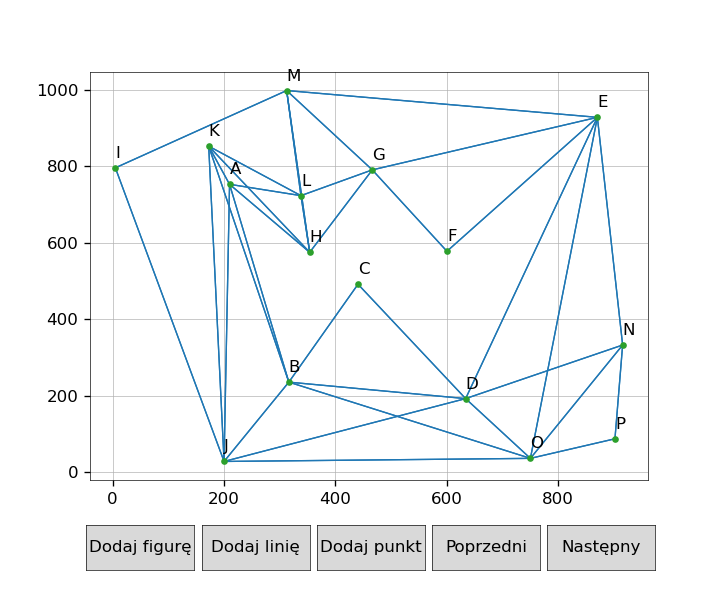

In [4]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot1 = Plot(visibility_graph_scenes(F))
plot1.draw()

### Wyświetlenie incydentnych krawędzi grafu widoczności dla kolejnych wierzchołków
Krawędzie dla kolejnych wierzchołków są wyświetlane w kolejnych scenach

<IPython.core.display.Javascript object>


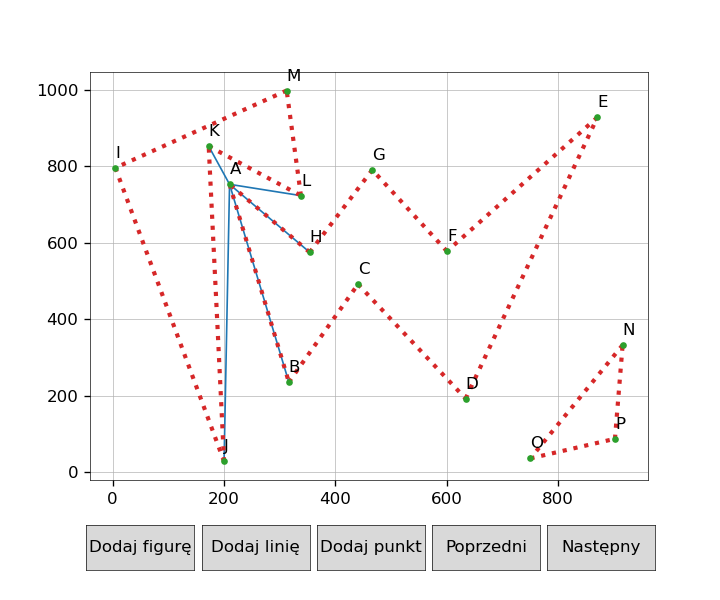

In [5]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot2 = Plot(visibility_graph_scenes_separately(F))
plot2.draw()

### Zapisywanie kolejnych kroków algorytmu do plików .jpg w folderze out
Uwaga, dla większych grafów liczba kroków jest bardzo dużo i zapisywanie jest bardzo czasochłonne

In [6]:
%%capture
plotter1 = Plotter(draw_partial=True)
create_visibility_graph(F, plotter1)

<br><br>
## Wyznaczanie grafu widoczności dla wprowadzonych figur

### Wprowadzanie figury
Figury należy wprowadzać dodając wierzchołki w kolejności odwrotnej do ruchu wskazówek zegara

<IPython.core.display.Javascript object>


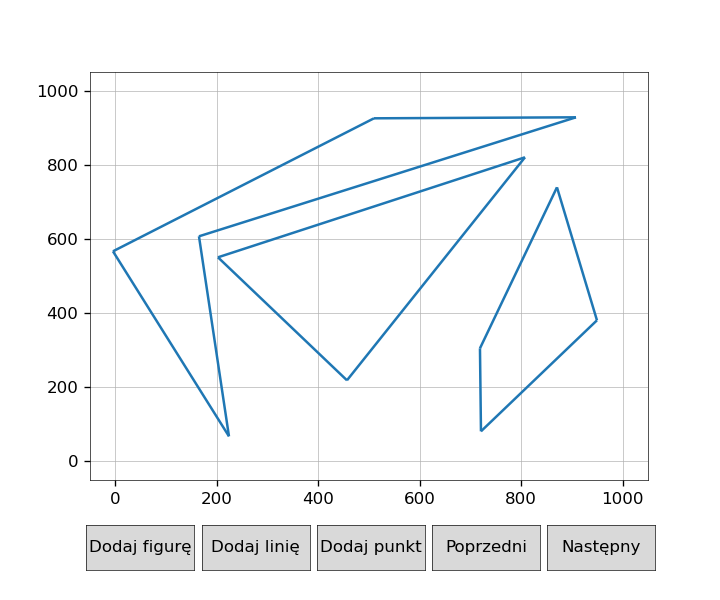

In [10]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

scenes3 = [Scene([PointsCollection([])],[LinesCollection([[(0, 0),(0, 0)], [(1000, 1000),(1000, 1000)]])])]
plot3 = Plot(scenes3)
plot3.draw()

### Wyświetlenie grafu widoczności

<IPython.core.display.Javascript object>


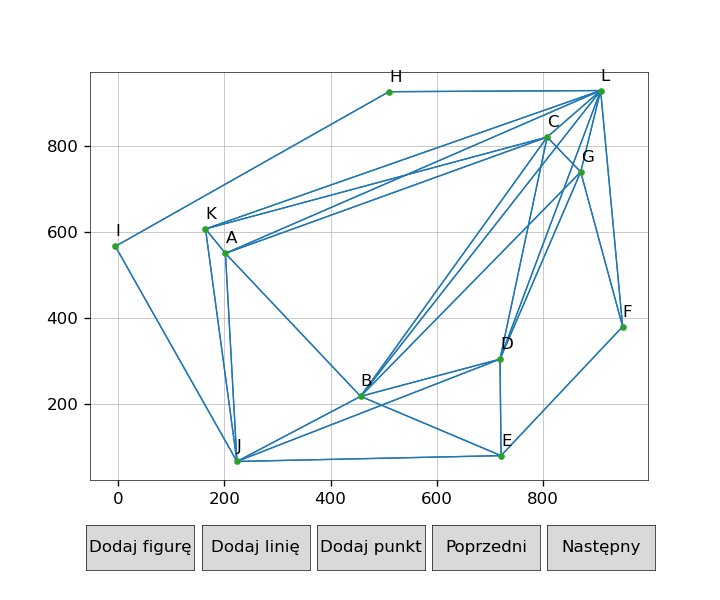

In [12]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot4 = Plot(visibility_graph_scenes(get_figures_from_plot(plot3)))
plot4.draw()

### Wyświetlenie incydentnych krawędzi grafu widoczności dla kolejnych wierzchołków

<IPython.core.display.Javascript object>


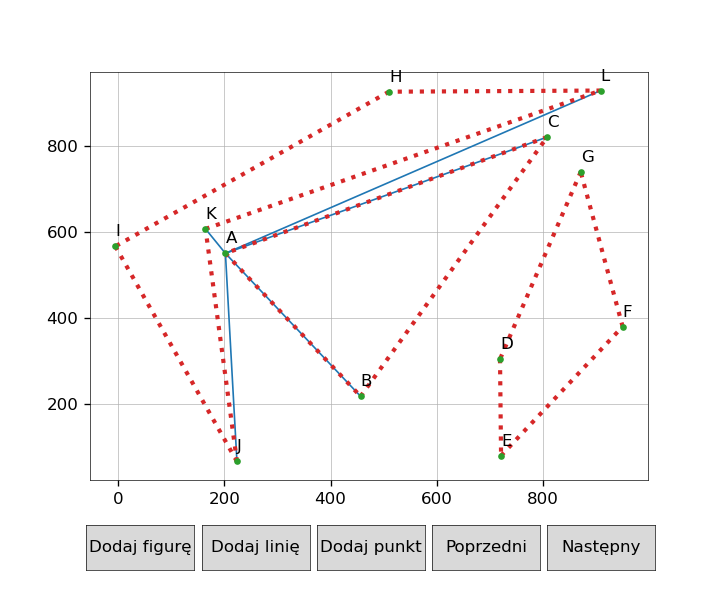

In [13]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot5 = Plot(visibility_graph_scenes_separately(get_figures_from_plot(plot3)))
plot5.draw()

### Zapisywanie kolejnych kroków algorytmu do plików .jpg w folderze out

In [44]:
%%capture
plotter2 = Plotter(draw_partial=True)
create_visibility_graph(get_figures_from_plot(plot3), plotter2)

<br><br>
## Przykład 2 - Wyznaczanie najkrótszej ścieżki pomiędzy dwoma punktami na płaszczyźnie z przeszkodami

### Wczytywanie przykładowych figur i punktów

In [14]:
F = [Figure([Point(-0.7784498207885235, 206.29595588235293), Point(156.92764336917563, 217.0802696078432), Point(141.1570340501792, 6.786151960784252), Point(302.8057795698925, 316.8351715686275), Point(227.89538530465953, 483.99203431372564), Point(149.0423387096774, 333.0116421568629), Point(-20.49171146953404, 524.4332107843139)]), Figure([Point(395.45810931899643, 297.96262254901967), Point(381.65882616487454, 187.42340686274508), Point(590.619399641577, 63.403799019607845), Point(754.2394713261649, 284.4822303921569), Point(624.1319444444445, 413.89399509803934), Point(602.4473566308244, 222.4724264705883)]), Figure([Point(275.2072132616487, 686.197916666667), Point(324.49036738351253, 459.7273284313727), Point(440.7986111111111, 365.3645833333335), Point(541.3362455197133, 338.40379901960796), Point(572.8774641577061, 473.2077205882355), Point(653.7018369175628, 524.4332107843139), Point(744.3828405017921, 443.55085784313735), Point(811.4079301075268, 222.4724264705883), Point(738.4688620071685, -25.566789215686356), Point(1030.2251344086021, -9.390318627451052), Point(1030.2251344086021, 626.8841911764708), Point(937.5728046594983, 405.80575980392166), Point(797.6086469534051, 969.2861519607848), Point(653.7018369175628, 686.197916666667)]), Figure([Point(-32.319668458781365, 780.5606617647061), Point(99.75918458781362, 486.68811274509824), Point(218.0387544802867, 772.4724264705885), Point(610.3326612903226, 761.6881127450984), Point(744.3828405017921, 1020.511642156863), Point(-34.290994623655905, 1031.2959558823534)])]
P = [Point(300, 200), Point(900, 800)]

### Wyświetlanie najkrótszej ścieżki

<IPython.core.display.Javascript object>


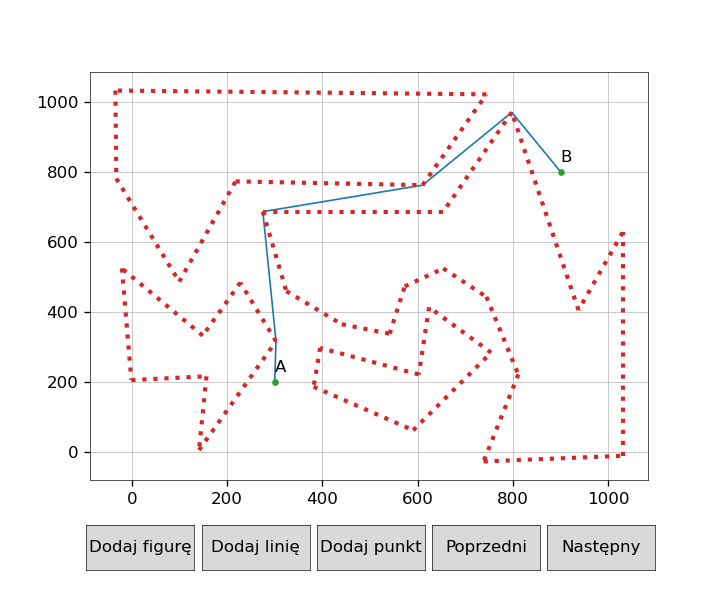

In [15]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

if len(P) >= 2:
    plot7 = Plot(shortest_path_scene(F, P[0], P[1]))
    plot7.draw()

<br><br>
## Wyznaczanie najkrótszej ścieżki pomiędzy dwoma punktami na płaszczyźnie z przeszkodami, na podstawie wprowadzonych wprowadzonych figur i punktów

### Wprowadzanie figury

<IPython.core.display.Javascript object>


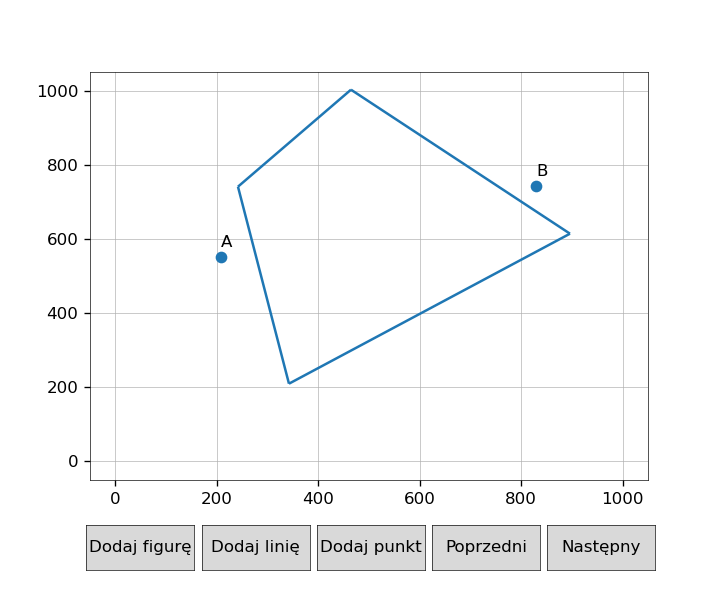

In [16]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

scenes7 = [Scene([PointsCollection([])],[LinesCollection([[(0, 0),(0, 0)], [(1000, 1000),(1000, 1000)]])])]
plot7 = Plot(scenes7)
plot7.draw()

### Wyświetlanie najkrótszej ścieżki

<IPython.core.display.Javascript object>


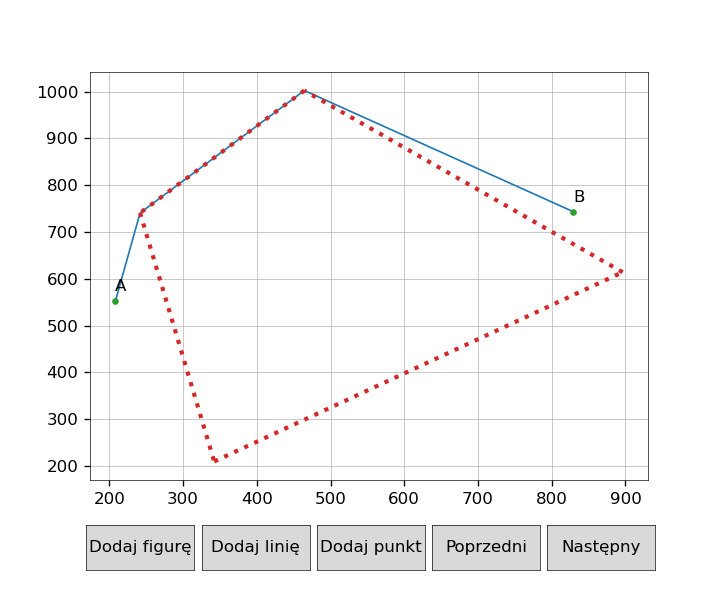

In [17]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

points = get_points_from_plot(plot7)
if len(points) >= 2:
    plot8 = Plot(shortest_path_scene(get_figures_from_plot(plot7), points[0], points[1]))
    plot8.draw()

<br><br>
## Testy

### Załadowanie testów

In [5]:
tests = []

# testy ze sprawozdania

# 1
tests.append([Figure([Point(0.4, 0.6), Point(0.20129870129870128, 0.4004329004329005), Point(0.3971861471861472, 0.19480519480519484), Point(0.6125541125541125, 0.2597402597402598), Point(0.6, 0.4), Point(0.4274891774891775, 0.4101731601731602)])])

# 2
tests.append([Figure([Point(0.4, 0.6), Point(0.20129870129870128, 0.4004329004329005), Point(0.3971861471861472, 0.19480519480519484), Point(0.6125541125541125, 0.2597402597402598), Point(0.6, 0.4), Point(0.6074891774891775, 0.6101731601731602)])])

# 3
tests.append([Figure([Point(0.4, 0.6), Point(0.14, 0.51), Point(0.29, 0.34)]), Figure([Point(0.6, 0.4), Point(0.59, 0.23), Point(0.88, 0.28), Point(0.83, 0.41)])])

# 4
tests.append([Figure([Point(0.4, 0.6), Point(0.23, 0.54), Point(0.37, 0.38)]), Figure([Point(0.71, 0.62), Point(0.44, 0.12), Point(0.81, 0.57)]), Figure([Point(0.8, 0.2), Point(0.85, 0.38), Point(0.95, 0.2)])])

# 5
tests.append([Figure([Point(0.45, 0.87), Point(0.17, 0.47), Point(0.49, 0.82)]), Figure([Point(0.6, 0.4), Point(0.42, 0.33), Point(0.54, 0.23)]), Figure([Point(0.8, 0.2), Point(0.85, 0.44), Point(0.96, 0.35)])])

# 6
tests.append([Figure([Point(0.4, 0.6), Point(0.6, 0.4), Point(0.4, 0.4)]), Figure([Point(0.8, 0.2), Point(0.92, 0.25), Point(0.83, 0.09)])])

# losowo generowane figury (kwadraty 1x1)

# 7
tests.append(generate_random_figures(8, 6))

# 8
tests.append(generate_random_figures(10, 20))

# 9
tests.append(generate_random_figures(20, 15))

# 10
tests.append(generate_random_figures(25, 30))

# 11
tests.append(generate_random_figures(50, 30))

# 12
# tests.append(generate_random_figures(100, 30))

# 13
# tests.append(generate_random_figures(150, 35))


### Wykonanie testów i zapisanie rysunków wynikowych w folderze out

In [17]:
%%capture
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 300, (12.0, 12.0)

for k, F in enumerate(tests):
    plot = Plot(visibility_graph_scenes(F)[1:])
    
    plot.draw()
    plt.savefig(f"out/test{k+1}.png")

### Wyświetlanie czasu wykonania poszczególnych testów

In [6]:
for k, F in enumerate(tests):
    start = time()
    create_visibility_graph(F)
    print(f"Test {k+1} czas wykonania: {round(time() - start, 5)} sekund")

Test 1 czas wykonania: 0.001 sekund
Test 2 czas wykonania: 0.001 sekund
Test 3 czas wykonania: 0.001 sekund
Test 4 czas wykonania: 0.00202 sekund
Test 5 czas wykonania: 0.00299 sekund
Test 6 czas wykonania: 0.00097 sekund
Test 7 czas wykonania: 0.04488 sekund
Test 8 czas wykonania: 0.07081 sekund
Test 9 czas wykonania: 0.31419 sekund
Test 10 czas wykonania: 0.48368 sekund
Test 11 czas wykonania: 2.2919 sekund
Test 12 czas wykonania: 10.62454 sekund
Test 13 czas wykonania: 25.89075 sekund


<br><br>
## Manualne wprowadzanie figur i punktów

### Wczytywanie figur i punktów

In [4]:
F = [Figure([Point(-0.7784498207885235, 206.29595588235293), Point(156.92764336917563, 217.0802696078432), Point(141.1570340501792, 6.786151960784252), Point(302.8057795698925, 316.8351715686275), Point(227.89538530465953, 483.99203431372564), Point(149.0423387096774, 333.0116421568629), Point(-20.49171146953404, 524.4332107843139)]), Figure([Point(395.45810931899643, 297.96262254901967), Point(381.65882616487454, 187.42340686274508), Point(590.619399641577, 63.403799019607845), Point(754.2394713261649, 284.4822303921569), Point(624.1319444444445, 413.89399509803934), Point(602.4473566308244, 222.4724264705883)]), Figure([Point(275.2072132616487, 686.197916666667), Point(324.49036738351253, 459.7273284313727), Point(440.7986111111111, 365.3645833333335), Point(541.3362455197133, 338.40379901960796), Point(572.8774641577061, 473.2077205882355), Point(653.7018369175628, 524.4332107843139), Point(744.3828405017921, 443.55085784313735), Point(811.4079301075268, 222.4724264705883), Point(738.4688620071685, -25.566789215686356), Point(1030.2251344086021, -9.390318627451052), Point(1030.2251344086021, 626.8841911764708), Point(937.5728046594983, 405.80575980392166), Point(797.6086469534051, 969.2861519607848), Point(653.7018369175628, 686.197916666667)]), Figure([Point(-32.319668458781365, 780.5606617647061), Point(99.75918458781362, 486.68811274509824), Point(218.0387544802867, 772.4724264705885), Point(610.3326612903226, 761.6881127450984), Point(744.3828405017921, 1020.511642156863), Point(-34.290994623655905, 1031.2959558823534)])]
P = [Point(300, 200), Point(900, 800)]

### Wyświetlenie grafu widoczności

<IPython.core.display.Javascript object>


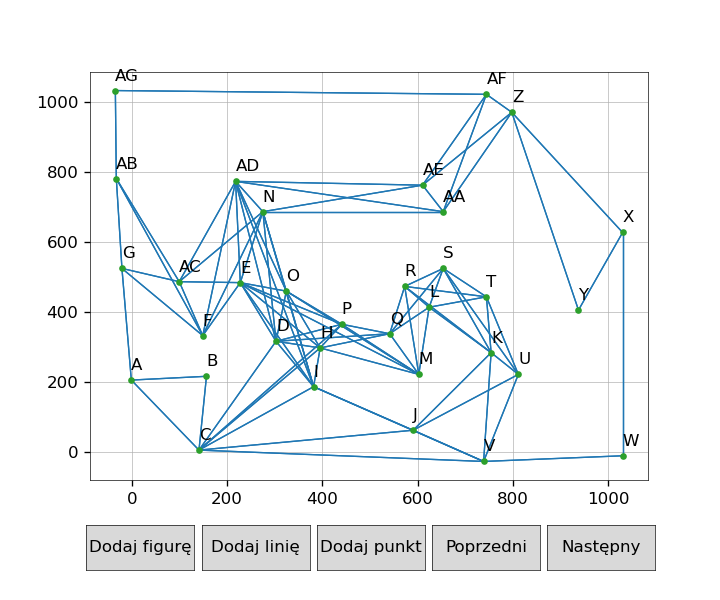

In [5]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot9 = Plot(visibility_graph_scenes(F))
plot9.draw()

### Wyświetlenie incydentnych krawędzi grafu widoczności dla kolejnych wierzchołków

<IPython.core.display.Javascript object>


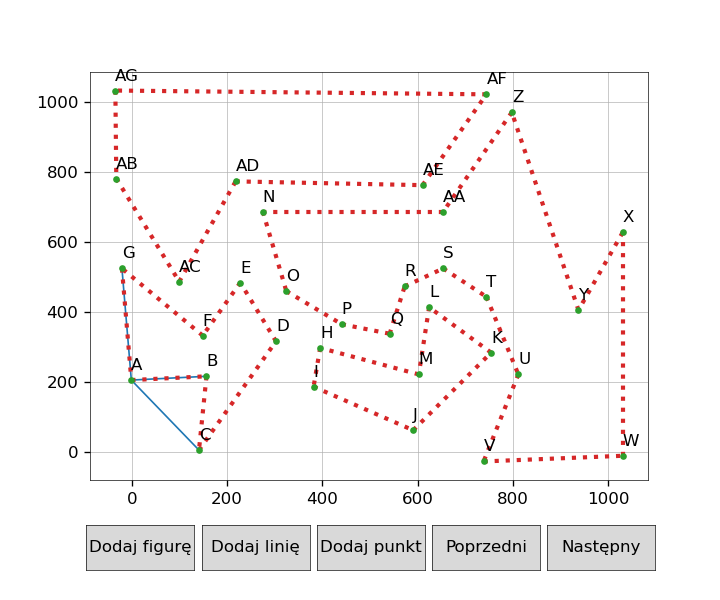

In [6]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)
plot10 = Plot(visibility_graph_scenes_separately(F))
plot10.draw()

### Zapisanie rysunku wynikowego w folderze out

In [7]:
%%capture
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 300, (12.0, 12.0)

plot11 = Plot(visibility_graph_scenes(F)[1:])
plot11.draw()
plt.savefig(f"out/test_manualny.png")

### Wyświetlanie najkrótszej ścieżki

<IPython.core.display.Javascript object>


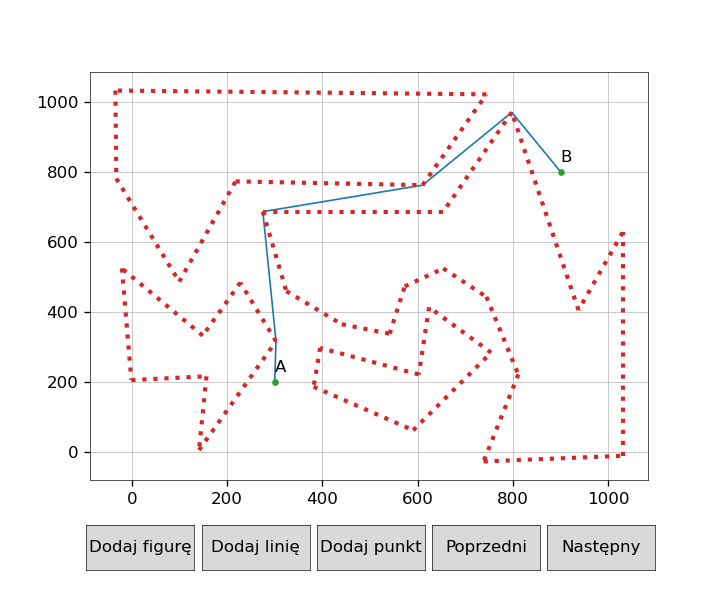

In [8]:
%matplotlib notebook
mpl.rcParams['figure.dpi'], mpl.rcParams['figure.figsize'] = 120, (6.0, 5.0)

if len(P) >= 2:
    plot12 = Plot(shortest_path_scene(F, P[0], P[1]))
    plot12.draw()